In [32]:
# %pip install pandas
# %pip install matplotlib

In [33]:
import pandas as pd
from sklearn.utils import shuffle
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [34]:
# Generate Random Campaings
# df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# df = shuffle(df)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.to_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx', index=False)

# Random Campaigns
df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx')
# clicks = random.randrange(0, 40)
# impressions = random.randrange(100, 2000)
# cost = random.uniform(0, 60)
# ctr = clicks/impressions * 100
# score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

# for i in df.index:
#     clicks = random.randrange(0, 40)
#     impressions = random.randrange(100, 2000)
#     cost = random.uniform(0, 60)
#     ctr = clicks/impressions * 100
#     score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

#     df.at[i,'clicks'] = clicks
#     df.at[i,'impressions'] = impressions
#     df.at[i,'cost'] = cost
#     df.at[i,'ctr'] = ctr
#     df.at[i,'score'] = score
    

display(df)
# print(clicks)
# print(impressions)
# print(cost)
# print(score)
# print(ctr)

,Keywords,Description,Headline,Location,Sitelink,Callout,Url,clicks,impressions,cost,ctr,score
0,project software,Project + Artwork Management Tool | 100% cloud...,Efficient Teamwork Starts Here,"USA, Canada",See Our Features\n\nD: Integrations - Automati...,Start in Minutes,https://twonas.com/services/ams/?source=genesis,13,981,3.883718,0.013252,0.282876
1,pm software,Free plans available. Integrate with your othe...,#1 Artwork Management Tool,"Australia, New Zealand","Free Plans Available\n\nD: Three Plans, All Co...",No Download Necessary,https://twonas.com/services/ams/why/?source=ge...,4,1655,58.415585,0.002417,0.311181
2,packaging design software,"Plan, Track, and Collaborate Using the Softwar...",Change The Way You Manage Art,"Norway, Sweden, Finland, Denmark, Iceland",Free Project Manager\n\nD: From Basic Projects...,For Teams of 3 and Up,https://twonas.com/services/ams/pricing/?sourc...,25,701,4.467889,0.035663,0.354886
3,workflow management software,Set for Success with Easy Integrations. Perfec...,Shape Your Workflow in Minutes,"Spain, France, Italy, Portugal",Free Workflow Manager\n\nD: Plans Built for Te...,Easy to Use,https://twonas.com/services/ams/contact/?sourc...,26,1917,53.195766,0.013563,0.547469
4,project plan tool,The Newest Tech in Artwork Management. Simple ...,Artwork Management Made Easy,"United Kingdom, Ireland",See Pricing\n\nD:See All of Our Plans and See ...,Free Plans Available,https://twonas.com/services/ams/features/?sour...,39,1304,22.014577,0.029908,0.567257


Randomly selected value from column 'Callout': Easy to Use
Randomly selected value from column 'Sitelink': Free Plans Available

D: Three Plans, All Company Sizes. Access Today.
Randomly selected value from column 'Keywords': workflow management software
Randomly selected value from column 'Headline': Artwork Management Made Easy
Randomly selected value from column 'Url': https://twonas.com/services/ams/why/?source=genesis
Randomly selected value from column 'Location': Norway, Sweden, Finland, Denmark, Iceland
Randomly selected value from column 'Description': Set for Success with Easy Integrations. Perfect Management for Pharma, Food, Retail.
step
1251.015895967712
77.31795434597039
step
3114.209457337725
39.38238329140425
step
3747.4349524285644
3.1621333333333332
step
3747.4349524285644
56.754380849855636
step
3747.4349524285644
8.333333333333332
step
3747.4349524285644
6.460468881767584
step
4470.37418217164
19.253333333333334
step
4470.37418217164
160.55955254537156
step
4470.374

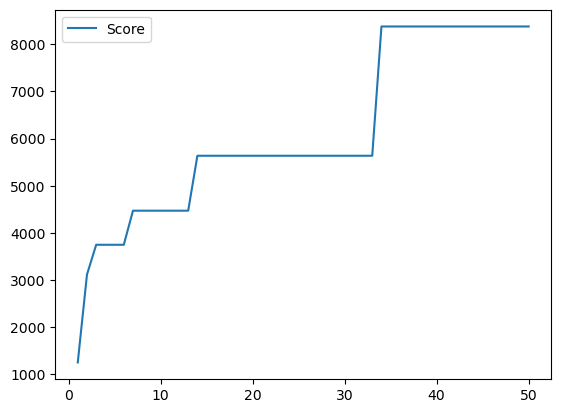

In [76]:
# Plant Propagation Algorithm

# Define the parameters to optimize
genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# convert DataFrame to sorted dictionary
parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
# remove NaN values from dictionary
parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

# Example parameter values
Keywords = parameters['Keywords']
Descriptions = parameters['Description']
Headlines = parameters['Headline']
Locations = parameters['Location']
Sitelinks = parameters['Sitelink']
Callouts = parameters['Callout']
Urls = parameters['Url']

# Constants
POPULATION_SIZE = 20
GENERATIONS = 50
NMAX = 20
MUTATION_RATE = 0.5

# randomly select one or more columns
df_sub = df.iloc[:, :7]
columns_to_select = random.sample(list(df_sub.columns), random.randint(1, 7))

# randomly select an element from each selected column
values_to_check = []
for col in columns_to_select:
    row_index = random.randint(0, len(df_sub) - 1)
    value = df_sub.loc[row_index, col]
    values_to_check.append(value)
    print(f"Randomly selected value from column '{col}': {value}")

# Function to generate an individual with random parameters
def createRandomIndividual():
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    ctr = clicks/impressions * 100
    score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

    individual = {
        "Keywords": random.sample(Keywords, k=random.randint(1, 5)),
        "Description": random.choice(Descriptions),
        "Headline": random.choice(Headlines),
        "Location": random.choice(Locations),
        "Sitelink": random.choice(Sitelinks),
        "Callout": random.choice(Callouts),
        "Url": random.choice(Urls),
        "Click": clicks,
        "Impression": impressions,
        "Score": score
    }
    return individual

# Function to generate an initial population
def initializePopulation():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = createRandomIndividual()
        population.append(individual)
    return population

def normalizePopulation(population):
    # print(*population, sep = "\n") 
    xmax = max(population, key=lambda x: x['Score'])
    xmin = min(population, key=lambda x: x['Score'])

    print(xmax['Score'])
    print(xmin['Score'])
    
    for individual in population:
        if xmax['Score'] != xmin['Score']:
            normalizedValue = (individual['Score'] - xmin['Score']) / (xmax['Score'] - xmin['Score'])
        else:
            normalizedValue = 0.0
        # print(normalizedValue)
        individual['normalizedValue'] = normalizedValue
        # print("test: " + str(individual['normalizedValue']))
    # print(*population, sep = "\n") 

def calculateFitness(population):
    for individual in population:
        normalizedValue = individual['normalizedValue']
        # print("test: " + str(normalizedValue))
        fitness = 0.5 * (math.tanh(4 * normalizedValue - 2) + 1)
        # print("fitness:" + str(fitness))
        individual['fitness'] = fitness
        # print(individual)

def assignOffspring(population, nmax):
    offspringCounts = []

    for individual in population:
        r = random.random()
        offspringCount = math.ceil(nmax * individual['fitness'] * r)
        offspringCounts.append(offspringCount)

    return offspringCounts

def mutateIndividual(individual):
    for dimension in individual:
        if dimension == "Score":
                ctr = individual['Click']/individual['Impression'] * 100
                individual[dimension] = ((individual['Impression']/500)**2*(1/3)+(individual['Click']/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100
        elif dimension == "Impression":
            individual[dimension] = random.randrange(100, 2000)
        elif dimension == "Click":
            individual[dimension] = random.randrange(0, 40)
        elif random.random() < MUTATION_RATE:
            if dimension == "Keywords":
                individual[dimension] = random.sample(Keywords, k=random.randint(1, 5))
            elif dimension == "normalizedValue" or dimension == "fitness":
                continue
            else:
                individual[dimension] = random.choice(eval(dimension + "s"))

def generateOffspring(population, offspringCounts):
    offspringPopulation = []

    for individual, offspringCount in zip(population, offspringCounts):
        for _ in range(offspringCount):
            offspring = dict(individual)
            mutateIndividual(offspring)
            offspringPopulation.append(offspring)

    return offspringPopulation

def selectNextGeneration(parents, offspring):
    combinedPopulation = parents + offspring
    combinedPopulation.sort(key=lambda x: x['fitness'], reverse=True)
    return combinedPopulation[:POPULATION_SIZE]

# Step 1: Initialization
results = pd.DataFrame(index=['Score'])
population = initializePopulation()

# print(population)

for generation in range(GENERATIONS):
    print('step')
    # Step 2: Normalization
    normalizePopulation(population)

    # Step 3: Fitness assignment
    calculateFitness(population)

    # Step 4: Offspring assignment
    offspringCounts = assignOffspring(population, NMAX)

    # Step 5: Mutation and offspring generation
    offspringPopulation = generateOffspring(population, offspringCounts)

    # Step 6: Selection
    population = selectNextGeneration(population, offspringPopulation)
    
    new_row = pd.Series([max(population, key=lambda x: x['fitness'])['Score']], index=['Score'])
    # append the new row to the DataFrame
    results = results.append(new_row, ignore_index=True)

best_individual = max(population, key=lambda x: x['fitness'])
# print(pd.DataFrame(population))
print(*population, sep = "\n") 

results.plot()
print(pd.DataFrame(best_individual).squeeze())